# Importing Necessary Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.model_selection import GridSearchCV
 

# Data Preprocessing

In [2]:
df=pd.read_csv(r"C:\Users\Arigala.Adarsh\Downloads\diabetes(1).csv")

In [3]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# Exploratory Data Analysis

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.shape

(768, 9)

In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

C:\Users\Arigala.Adarsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


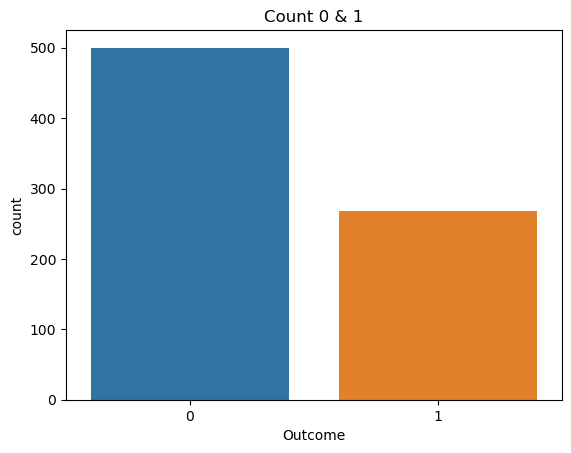

In [9]:
sns.countplot(df.Outcome)
plt.title('Count 0 & 1')
plt.show()

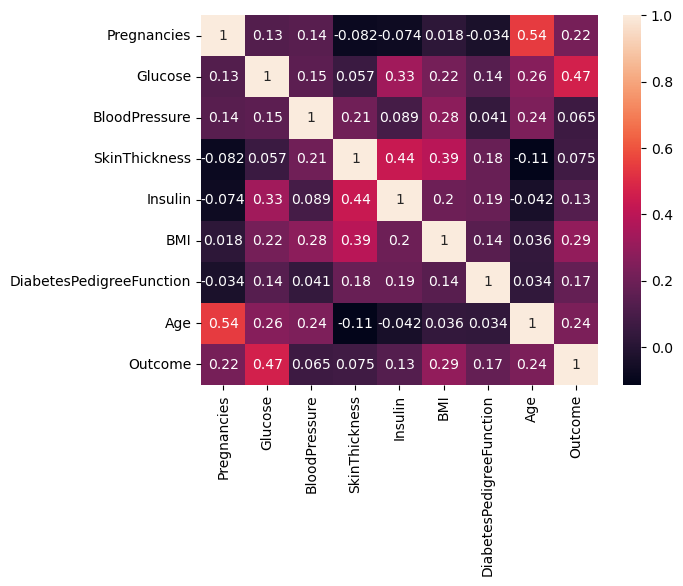

In [10]:
sns.heatmap(df.corr(),annot=True)
plt.show()

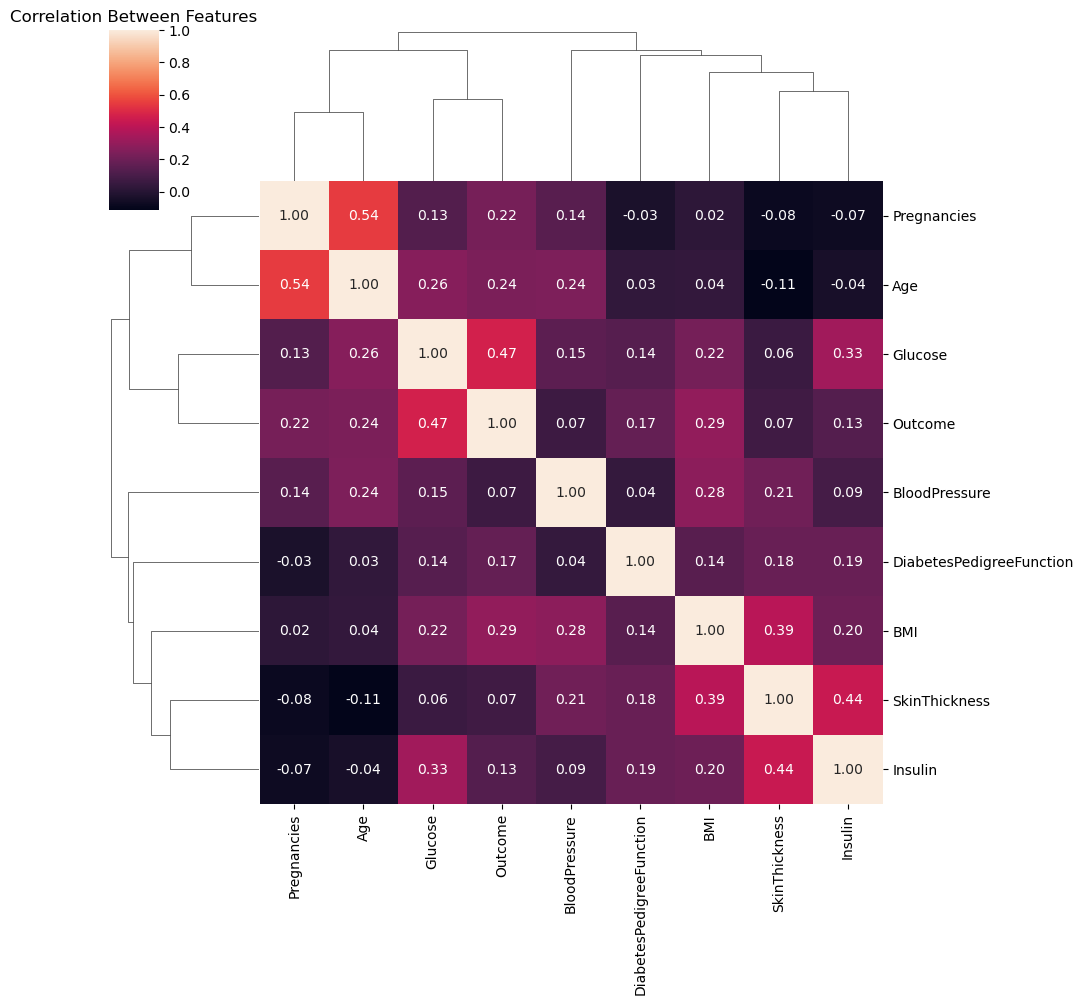

In [11]:
sns.clustermap(df.corr(),annot=True,fmt=".2f")
plt.title('Correlation Between Features')
plt.show()

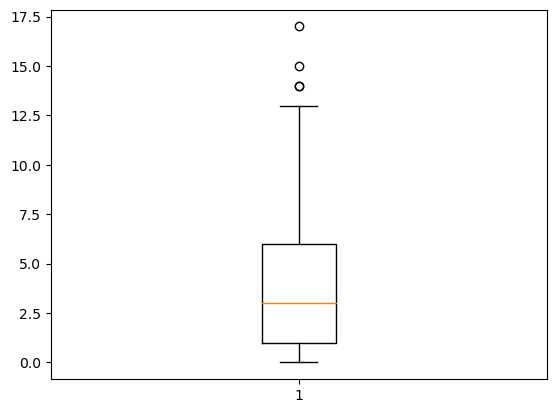

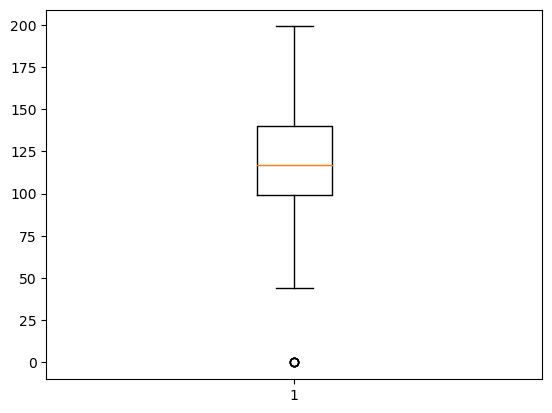

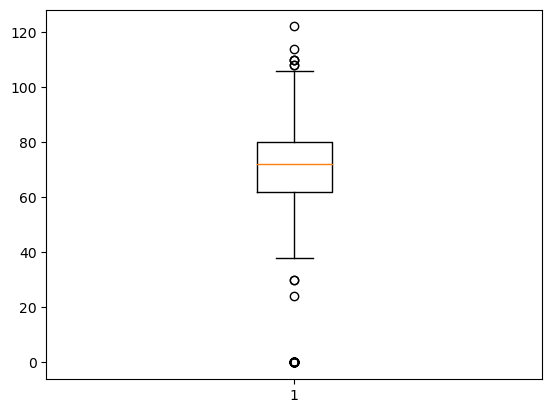

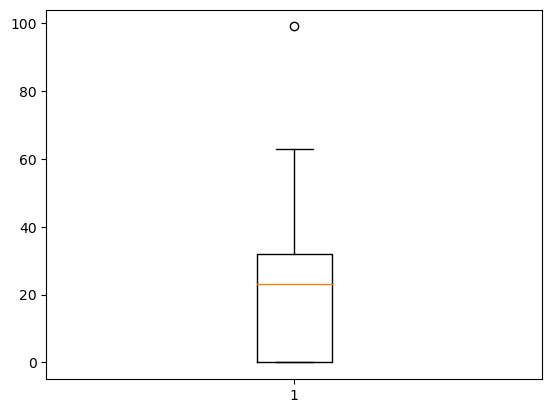

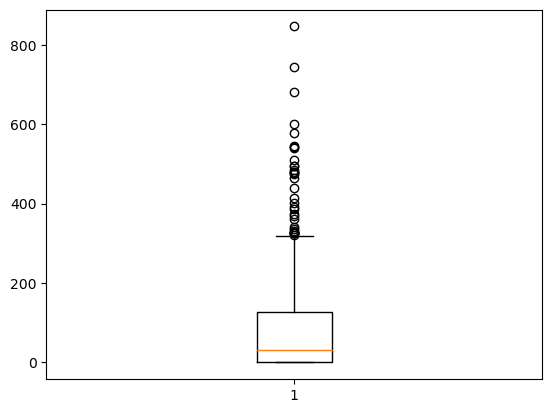

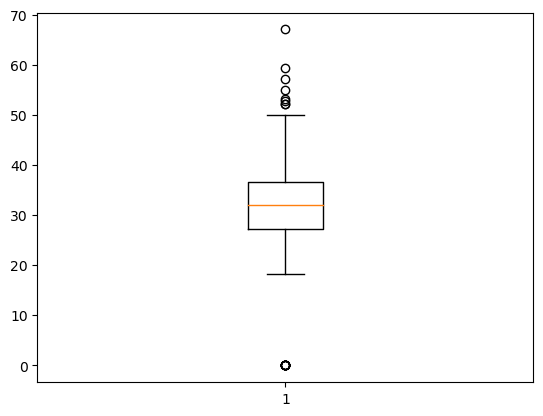

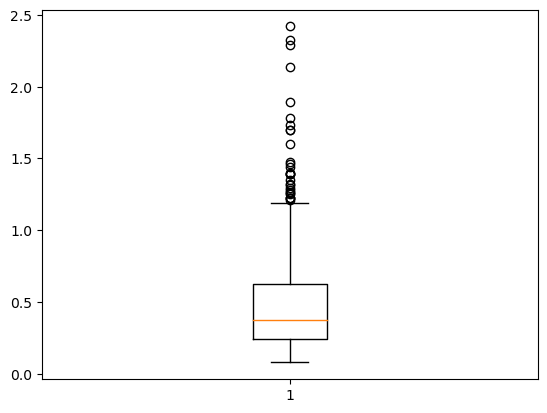

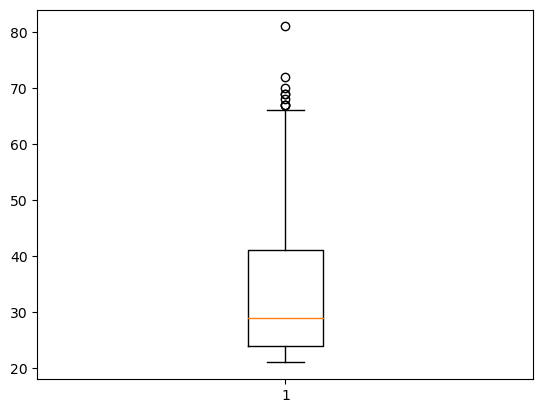

In [12]:
 for i in df.columns:
        if(i!='Outcome'):
            plt.boxplot(df[i])
            plt.show()
 

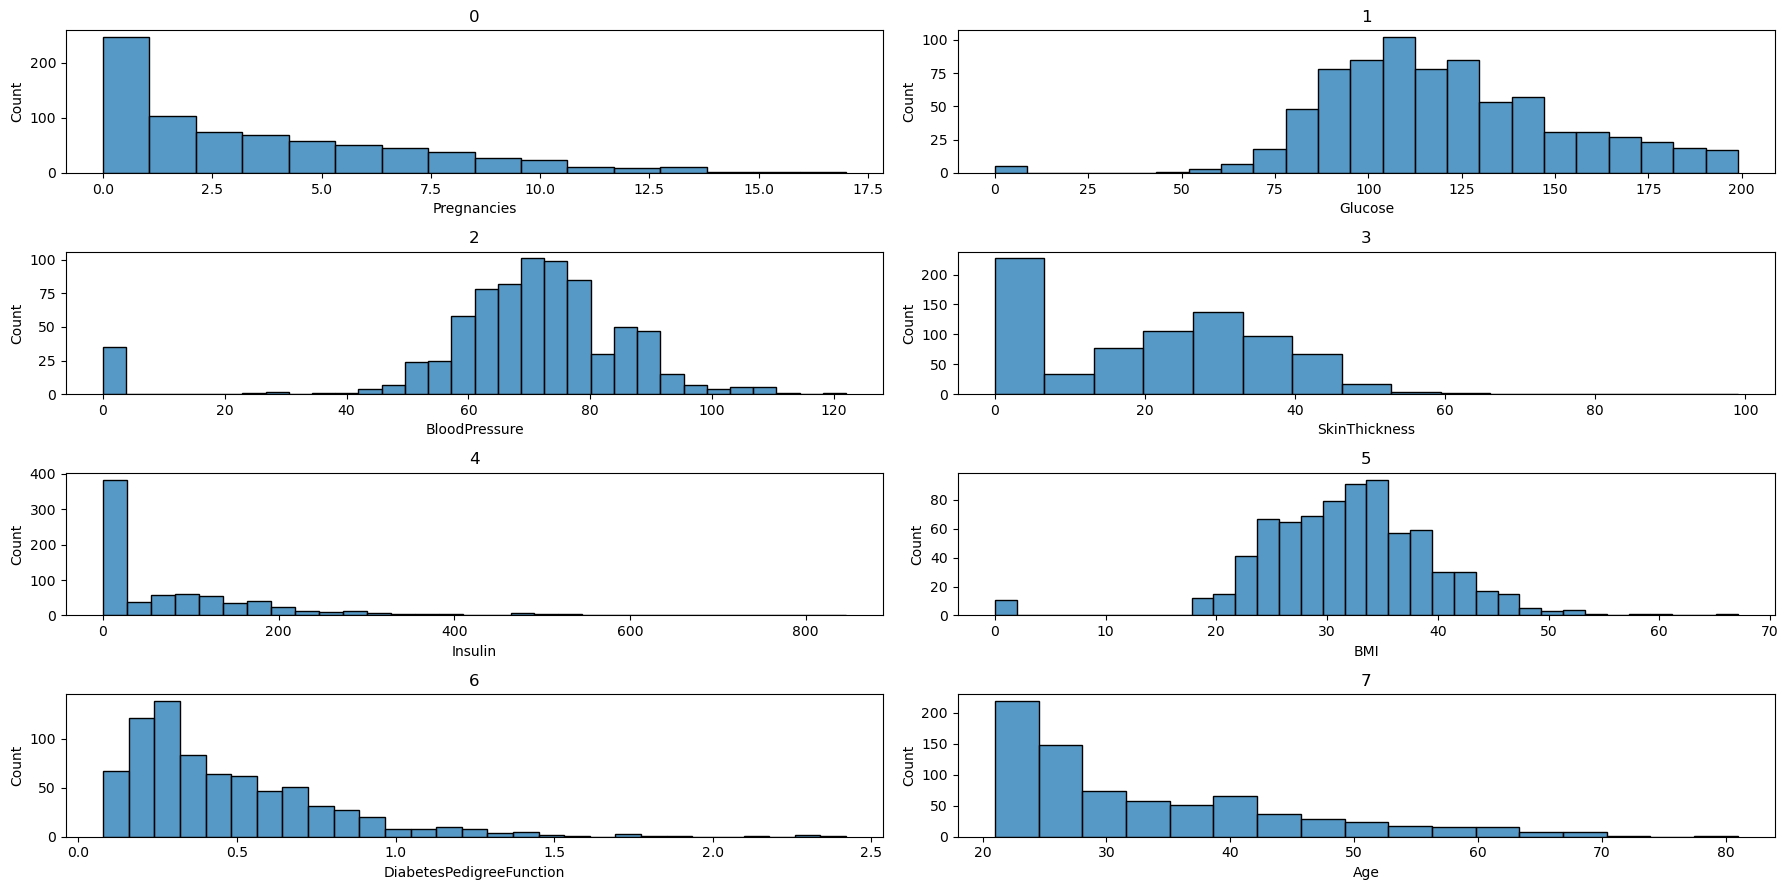

In [13]:
data1 = df[df["Outcome"] == 1]
columns = df.columns[:8]

plt.subplots(figsize=(18, 9))

for i, column in enumerate(columns):
    ax= plt.subplot(4, 2, i + 1)  
    # Plot the histogram for all data
    sns.histplot(df[column], kde=False)
    plt.title(i)


plt.tight_layout()
plt.show()


# Analysis of Diabetic Cases

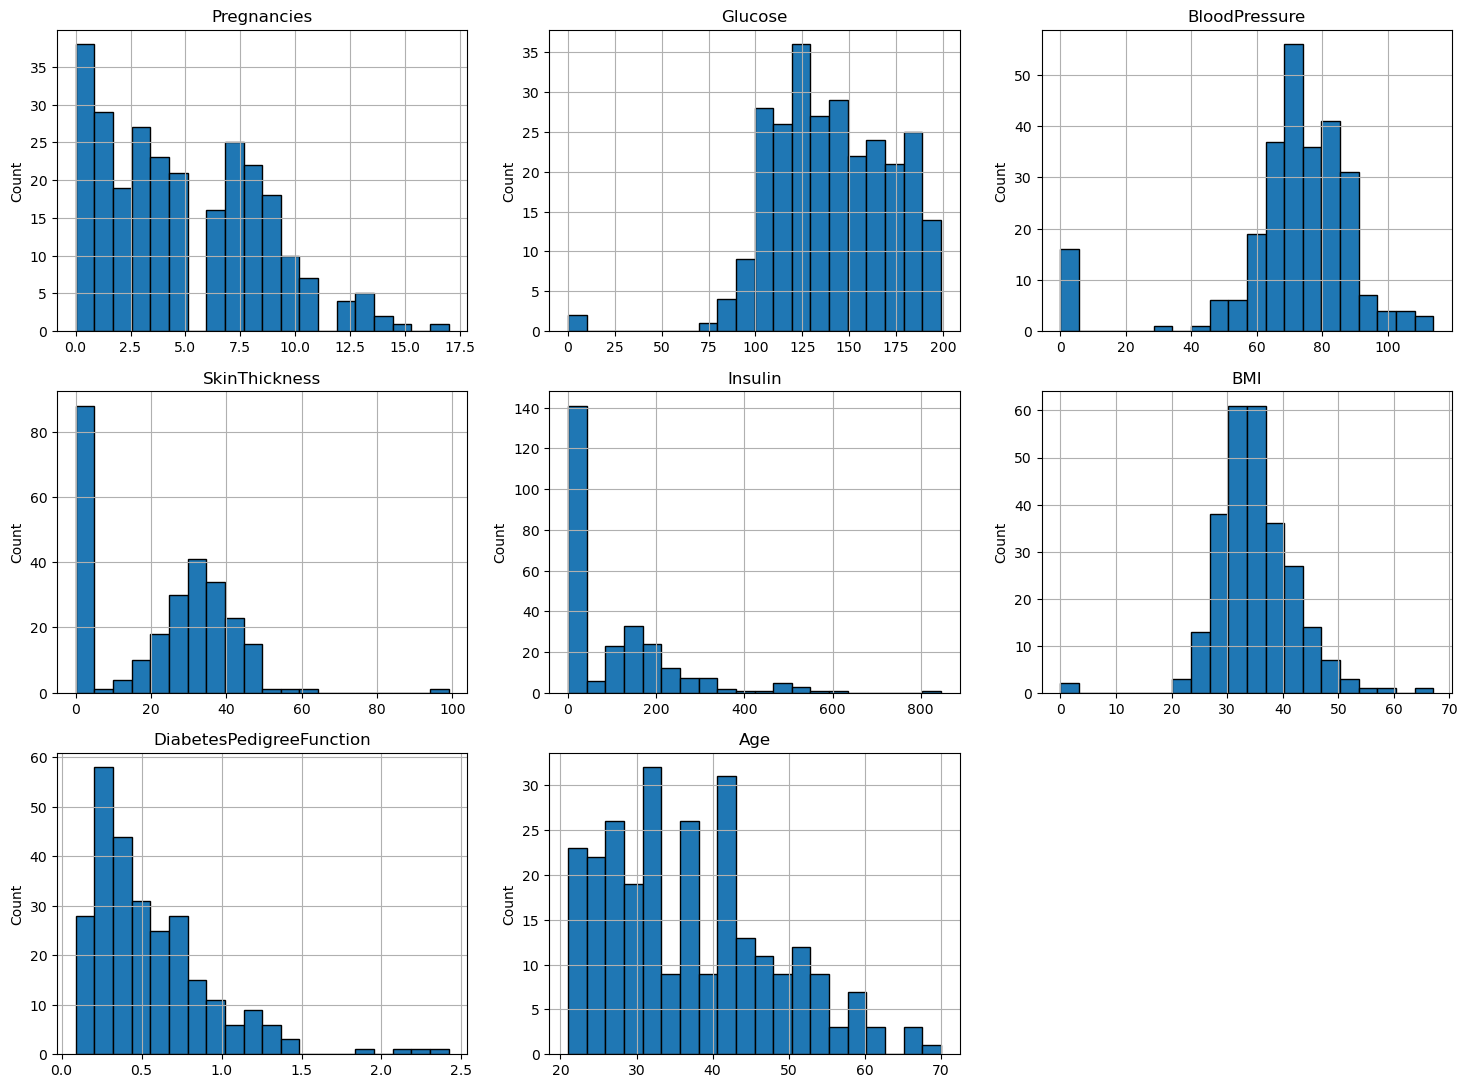

In [14]:
 #General Analysis
data1 = df[df["Outcome"]==1]
columns = df.columns[:8]
plt.subplots(figsize=(18,18))
length=len(columns)
for i, j in zip(columns, range(length)):
    plt.subplot((length//2),3,j+1)
    plt.ylabel("Count")
    data1[i].hist(bins=20,edgecolor='black')
    plt.title(i) 
plt.show()

# Analysis of Non-Diabetic Cases

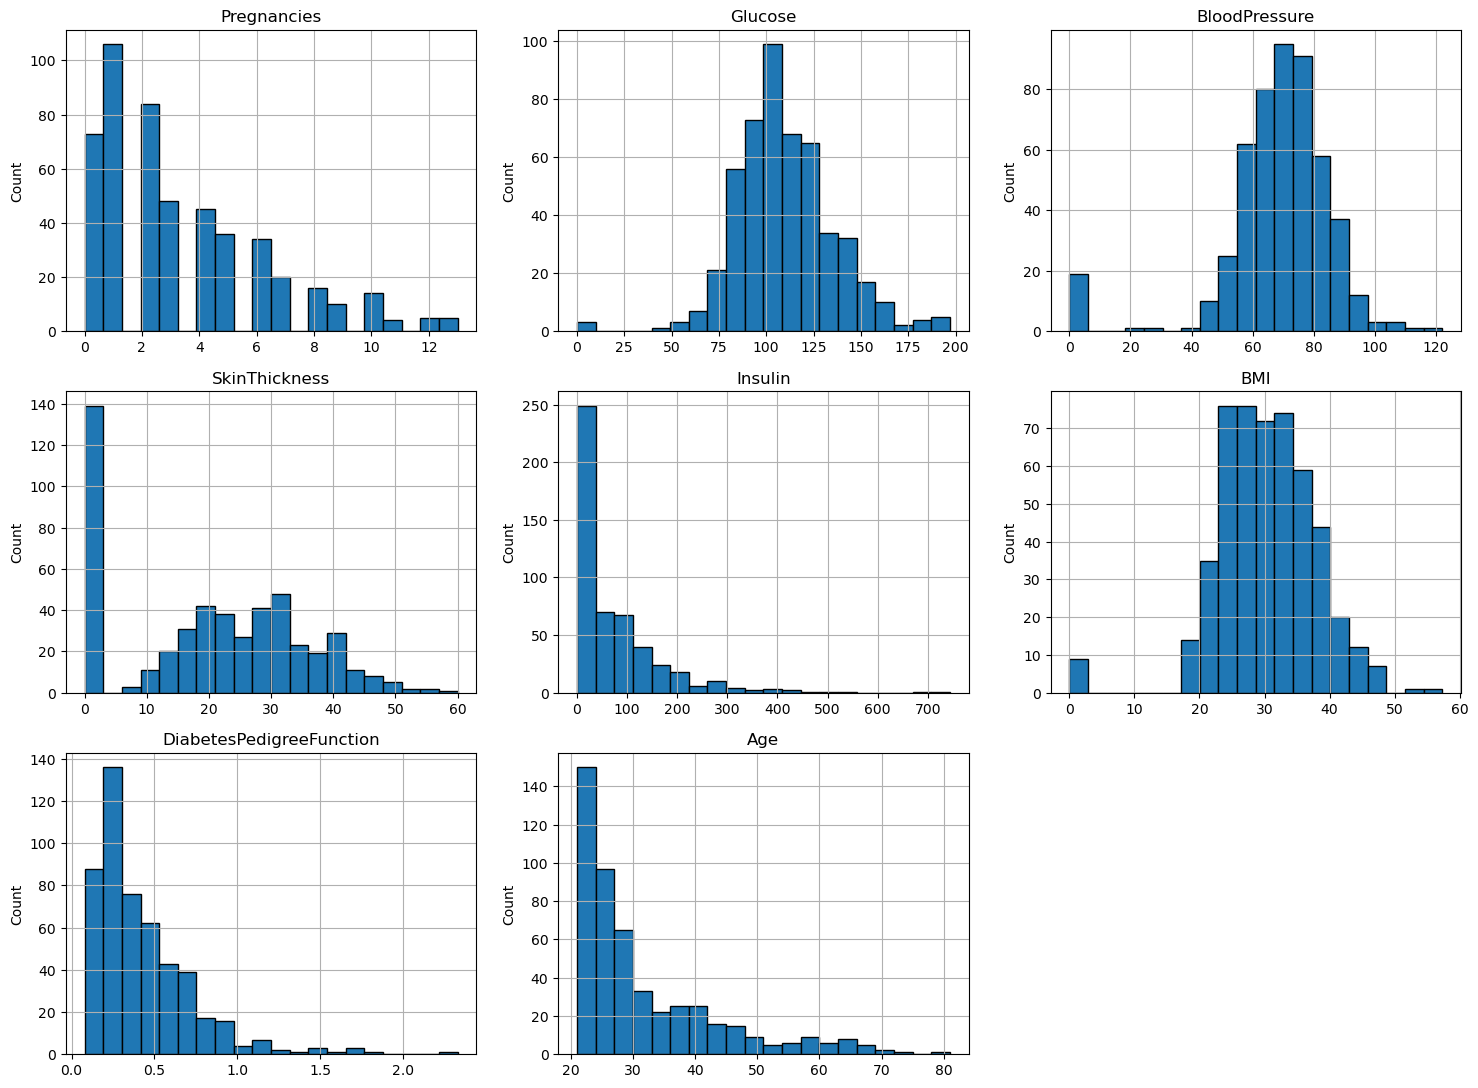

In [15]:
 #General Analysis
data1 = df[df["Outcome"]==0]
columns = df.columns[:8]
plt.subplots(figsize=(18,18))
length=len(columns)
for i, j in zip(columns, range(length)):
    plt.subplot((length//2),3,j+1)
    plt.ylabel("Count")
    data1[i].hist(bins=20,edgecolor='black')
    plt.title(i) 
plt.show()

In [16]:
#Split Data 
p = df[df.Outcome == 1]
n = df[df.Outcome == 0]

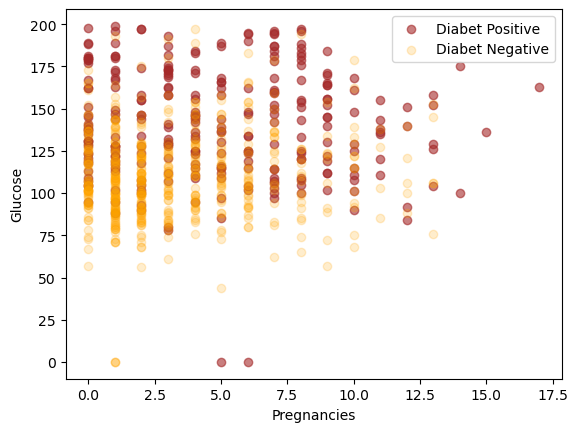

In [17]:
plt.scatter(p.Pregnancies,p.Glucose,color = "brown",label="Diabet Positive",alpha=0.6)
plt.scatter(n.Pregnancies,n.Glucose,color = "Orange",label="Diabet Negative",alpha=0.2)
plt.xlabel("Pregnancies")
plt.ylabel("Glucose")
plt.legend()
plt.show()


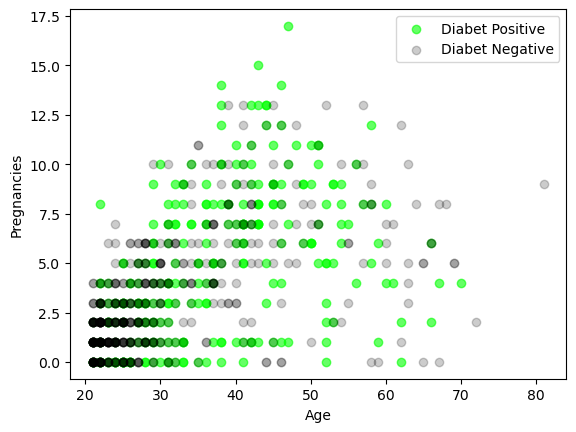

In [18]:
plt.scatter(p.Age,p.Pregnancies,color = "lime",label="Diabet Positive",alpha=0.6)
plt.scatter(n.Age,n.Pregnancies,color = "black",label="Diabet Negative",alpha=0.2)
plt.xlabel("Age")
plt.ylabel("Pregnancies")
plt.legend()
plt.show()

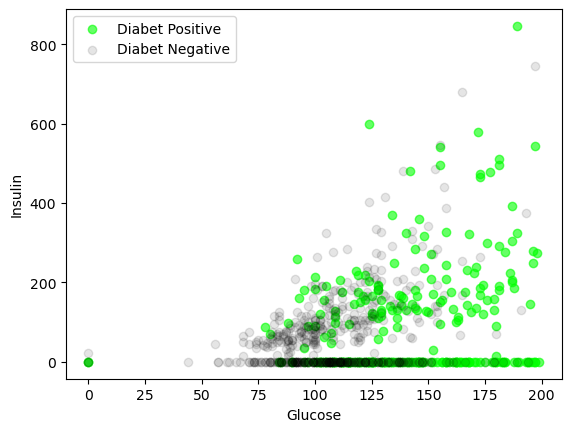

In [19]:
plt.scatter(p.Glucose,p.Insulin,color = "lime",label="Diabet Positive",alpha=0.6)
plt.scatter(n.Glucose,n.Insulin,color = "black",label="Diabet Negative",alpha=0.1)
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.legend()
plt.show()

# Identifying and Removal of Outlier

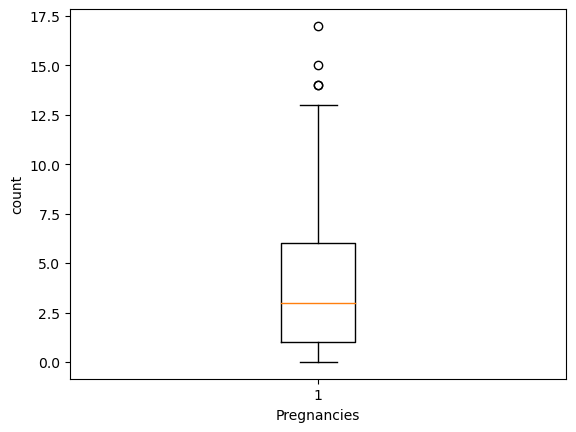

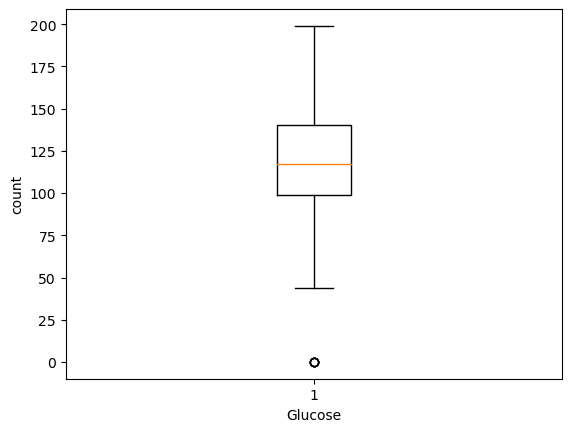

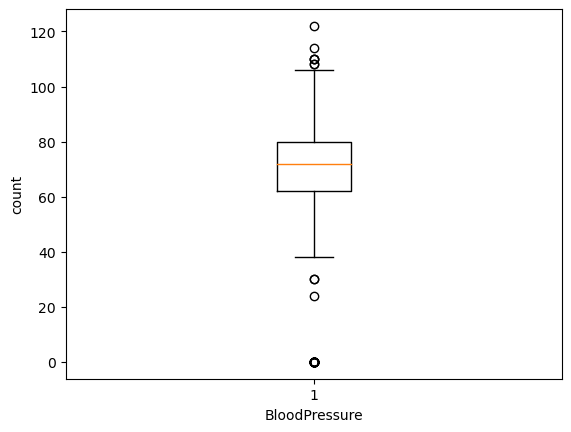

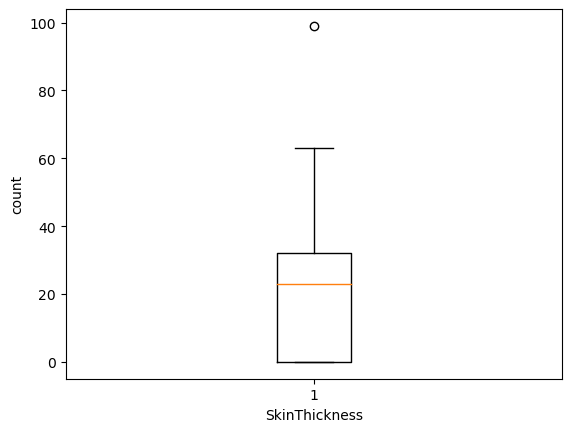

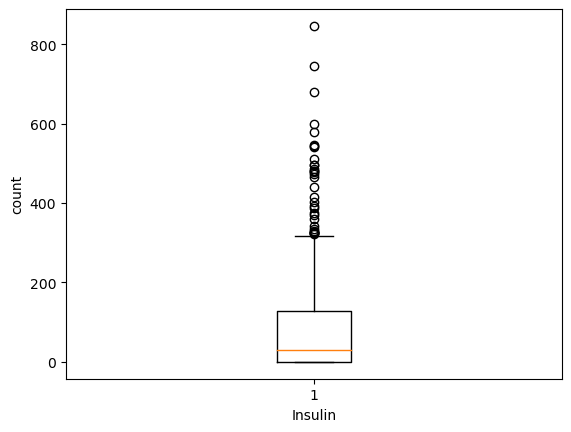

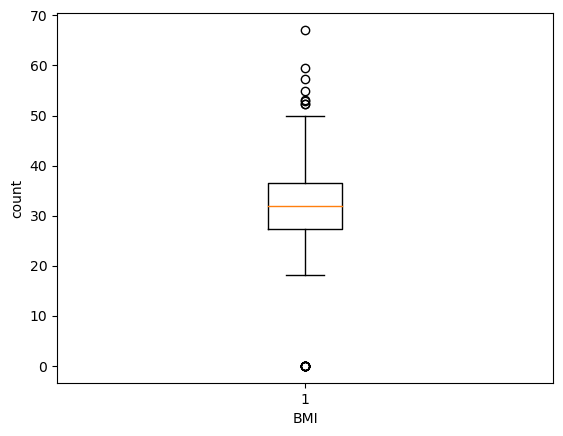

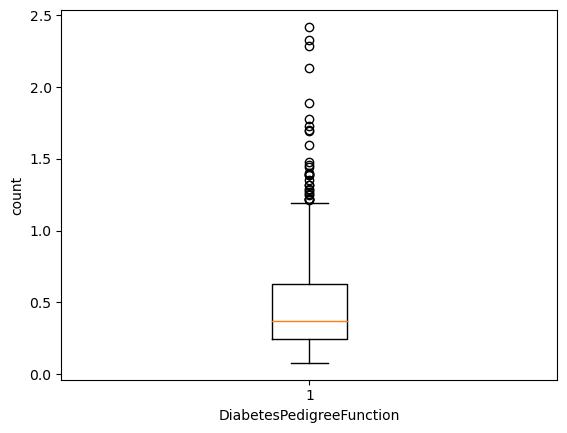

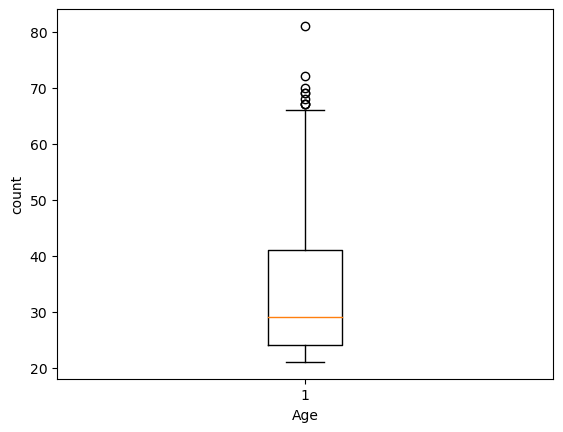

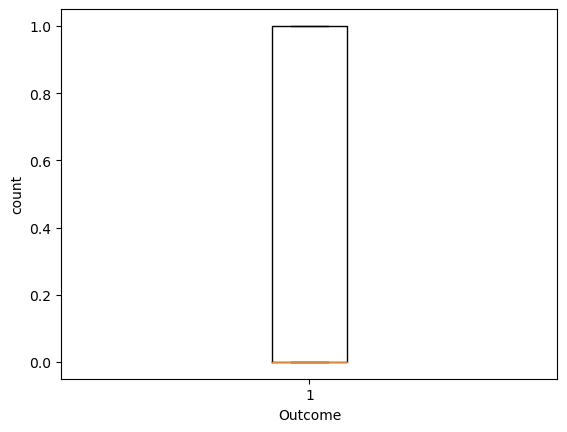

In [20]:
for col_name in df.columns:
    if(df[col_name].dtypes=='int64' or df[col_name].dtypes=='float64'):
        plt.boxplot(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [21]:
for i in df.columns:
    if(i!='Outcome'):
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        iqr=q3-q1
        df=df[(df[i]>q1-1.5*iqr) & (df[i]<q3+1.5*iqr)]

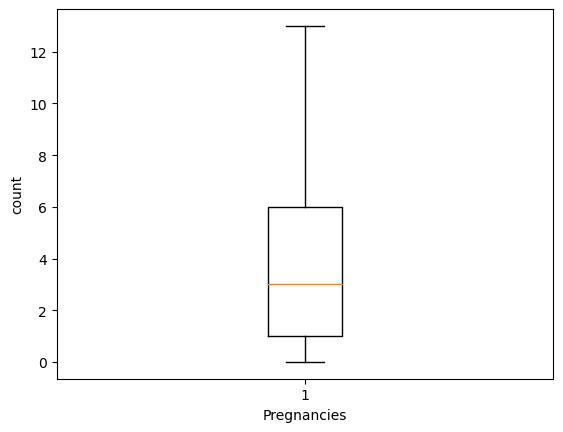

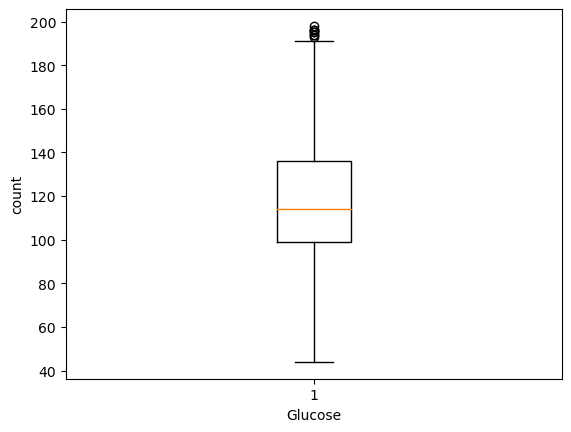

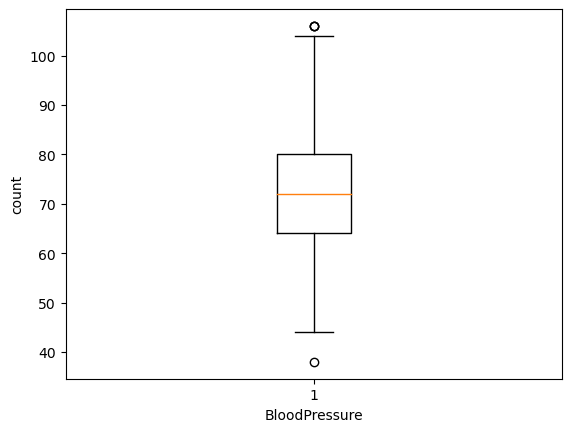

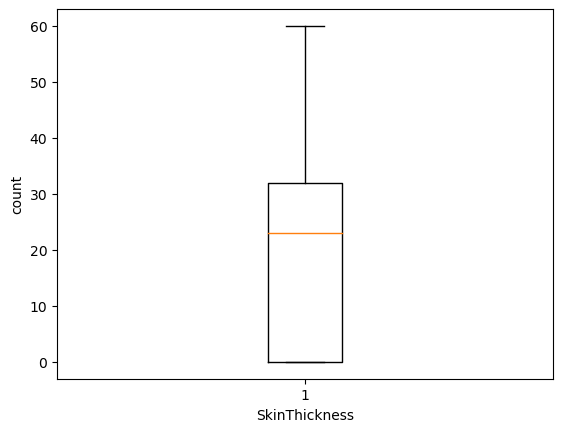

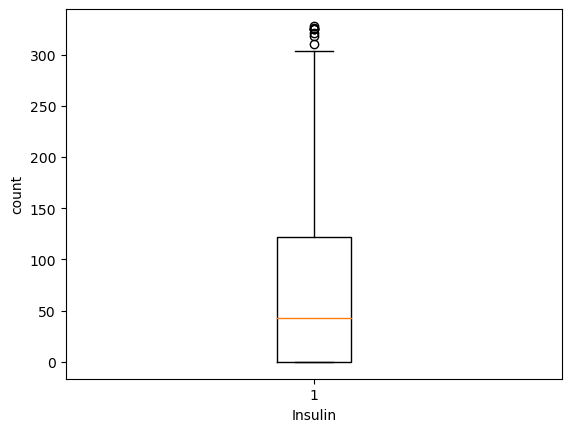

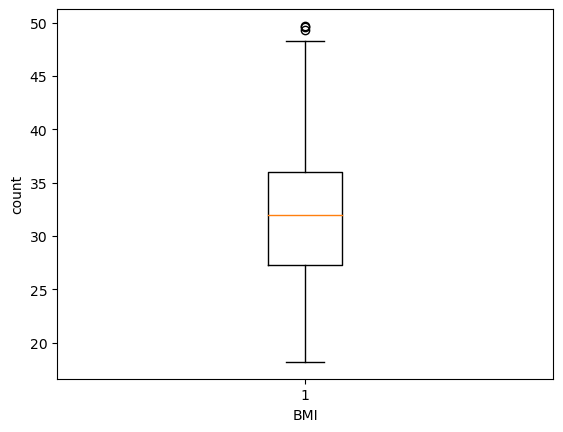

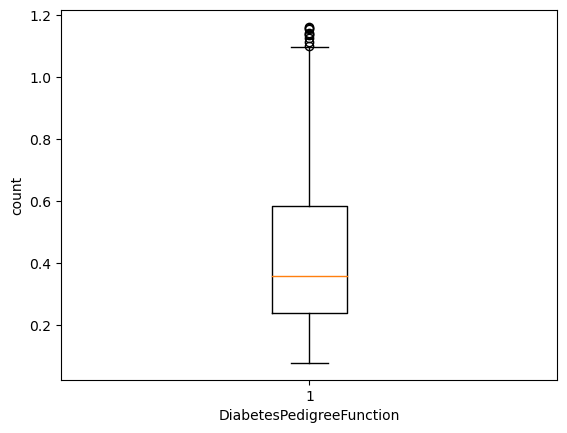

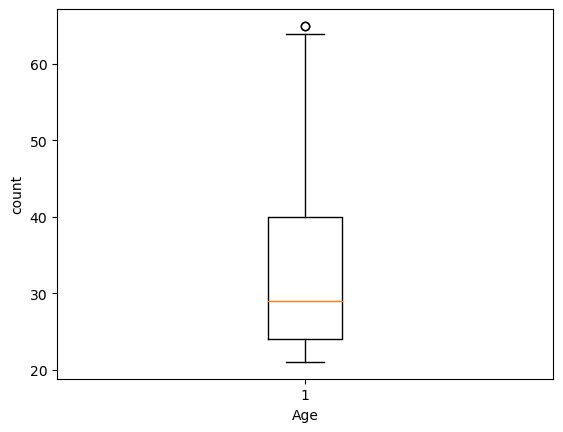

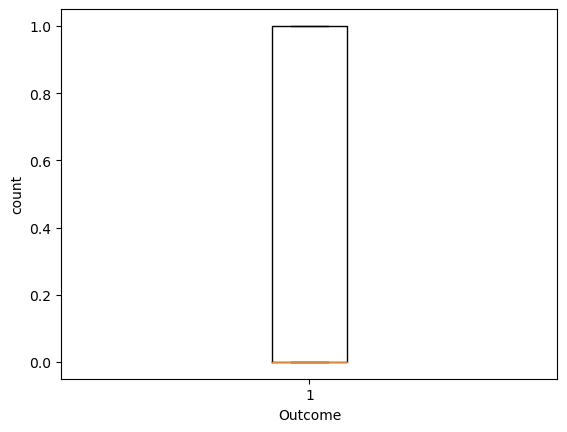

In [22]:
for col_name in df.columns:
    if(df[col_name].dtypes=='int64' or df[col_name].dtypes=='float64'):
        plt.boxplot(df[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

# Segregration od Data(independent and Dependent)

In [23]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

# Spliting of Dataset into Train and Test Data

In [24]:
test_size = 0.2

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=test_size,random_state=42)

* StandardScaler is a preprocessing technique used in machine learning and statistics to scale (standardize) the features     of a dataset. The goal of StandardScaler is to transform the data such that it has a mean of 0 and a 
  standard deviation of 1. This process is also known as "z-score normalization" or "z-score scaling." 
  
  Z = (X - μ) / σ
           "Z" is the standardized value.
           "X" is the original value.
           "μ" is the mean of the feature.
           "σ" is the standard deviation of the feature.


* StandardScaler is a good choice when you have features with different scales or units, and you want to ensure that they all have the same scale for modeling purposes. It's commonly used with algorithms like Support Vector Machines (SVM), Principal Component Analysis (PCA), and k-Nearest Neighbors (k-NN).

In [25]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) 

x_test = scaler.transform(x_test)


# Decision Tree Model


In [26]:
model = tree.DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [27]:
prediction=model.predict(x_test)

In [28]:
print(metrics.classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81        97
           1       0.45      0.61      0.52        31

    accuracy                           0.73       128
   macro avg       0.66      0.69      0.66       128
weighted avg       0.76      0.73      0.74       128



In [29]:
print(metrics.accuracy_score(y_test,prediction))

0.7265625


### Hyper Parameter Tuning

In [30]:
parameter={
    'max_depth':[None,10,20,30],
    'min_samples_leaf':[1,2,4],
    'min_samples_split':[2,5,10],
    'max_features':['auto','sqrt'],
    'criterion': ['gini', 'entropy']
 
}
rf_classifier = DecisionTreeClassifier(random_state=42)
grid_search=GridSearchCV( estimator=rf_classifier ,param_grid=parameter,verbose=2,cv=5,n_jobs=-1)
grid_search.fit(x, y)
print("Best Parameters",grid_search.best_params_)
 

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2}


C:\Users\Arigala.Adarsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
360 fits failed out of a total of 720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
195 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Arigala.Adarsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Arigala.Adarsh\anaconda3\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Arigala.Adarsh\anaconda3\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\U

In [31]:
model = tree.DecisionTreeClassifier(criterion= 'gini', max_depth= None, max_features= 'sqrt', min_samples_leaf= 4, min_samples_split= 2)
model.fit(x_train, y_train)


DecisionTreeClassifier(max_features='sqrt', min_samples_leaf=4)

In [32]:
prediction=model.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test,prediction))

Accuracy: 0.671875


# Random Forest Model

In [33]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
prediction=model.predict(x_test)

In [34]:
print(metrics.classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85        97
           1       0.55      0.58      0.56        31

    accuracy                           0.78       128
   macro avg       0.70      0.71      0.71       128
weighted avg       0.79      0.78      0.78       128



In [35]:
print(metrics.accuracy_score(y_test,prediction))

0.78125


### Hyper Parameter Tuning

In [36]:
parameter={
    'max_depth':[None,10,20,30],
    'min_samples_leaf':[1,2,4],
    'min_samples_split':[2,5,10],
    'max_features':['auto','sqrt'],
    'n_estimators':[100,200,300]
}
rf_classifier = RandomForestClassifier(random_state=42)
grid_search=GridSearchCV( estimator=rf_classifier ,param_grid=parameter,verbose=2,cv=5,n_jobs=-1)
grid_search.fit(x, y)
 

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


C:\Users\Arigala.Adarsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
158 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Arigala.Adarsh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Arigala.Adarsh\anaconda3\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Arigala.Adarsh\anaconda3\lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [37]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [38]:
model=RandomForestClassifier(max_depth=10,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,n_estimators=100)
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test,prediction))

Accuracy: 0.765625


# KNN Model

In [39]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)
prediction=model.predict(x_test)

In [40]:
print(metrics.classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        97
           1       0.53      0.58      0.55        31

    accuracy                           0.77       128
   macro avg       0.70      0.71      0.70       128
weighted avg       0.78      0.77      0.78       128



In [41]:
print(metrics.accuracy_score(y_test,prediction)) 

0.7734375


### Hyper Parameter Tuning

In [42]:
# Define the hyperparameter grid
param_grid = {
    'n_neighbors': [3,5,7,9,11],  # Example values for n_neighbors
    'weights': ['uniform', 'distance'],  # Weighting options
    'metric': ['euclidean', 'manhattan']  # Distance metrics
}

# Create the KNN classifier
knn = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(x_train, y_train)
print("best parameters :",grid_search.best_params_)



best parameters : {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}


In [43]:
hyper_knn = KNeighborsClassifier(n_neighbors=11,metric="euclidean",weights="distance")
hyper_knn.fit(x_train,y_train)
hyper_prediction = hyper_knn.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test,hyper_prediction))

Accuracy: 0.734375


# Naive Bayes Model

In [44]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
prediction=model.predict(x_test)

In [45]:
print(metrics.classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81        97
           1       0.43      0.48      0.45        31

    accuracy                           0.72       128
   macro avg       0.63      0.64      0.63       128
weighted avg       0.73      0.72      0.72       128



In [46]:
print(metrics.accuracy_score(y_test,prediction)) 

0.71875


# Logistic Regression Model

In [47]:
logistic=LogisticRegression(solver="liblinear")
logistic_model=logistic.fit(x,y)
logistic_model


LogisticRegression(solver='liblinear')

In [48]:
 prediction=logistic.predict(x_test)

C:\Users\Arigala.Adarsh\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [49]:
print(metrics.classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        97
           1       0.00      0.00      0.00        31

    accuracy                           0.76       128
   macro avg       0.38      0.50      0.43       128
weighted avg       0.57      0.76      0.65       128



C:\Users\Arigala.Adarsh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Arigala.Adarsh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Arigala.Adarsh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
print("Accuracy:",metrics.accuracy_score(y_test,prediction)) 

Accuracy: 0.7578125
